In [3]:
import os
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [4]:
import kagglehub
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
print('path to dataset file:', path)


path to dataset file: /Users/modupeolafagbenro/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [5]:
files = os.listdir(path)
print("files in the directory path and dataset inside:")
for file in files:
    print(file)

files in the directory path and dataset inside:
olist_sellers_dataset.csv
product_category_name_translation.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv


In [6]:
order_df = pd.read_csv(os.path.join(path, "olist_orders_dataset.csv"))
order_items_df = pd.read_csv(os.path.join(path, "olist_order_items_dataset.csv"))
customers_df= pd.read_csv(os.path.join(path,"olist_customers_dataset.csv"))
products_df= pd.read_csv(os.path.join(path, "olist_products_dataset.csv"))
print("Core dataset to be used:")
print(f"orders: {order_df.shape}")
print(f"order_items: {order_items_df.shape}")
print(f"customers: {customers_df.shape}")
print(f"products: {products_df.shape}")


Core dataset to be used:
orders: (99441, 8)
order_items: (112650, 7)
customers: (99441, 5)
products: (32951, 9)


In [7]:
print(order_df.head(5))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [8]:
print(customers_df.head(5))

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [9]:
#merge_dataset for comphensive analysis
main_df = order_df.merge(order_items_df, on='order_id')\
    .merge(customers_df, on='customer_id')\
    .merge(products_df, on='product_id')


print(main_df)

                                order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
112645  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
112646  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
112647  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112648  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_

In [10]:
#checking the shape of the dataset 
main_df.shape

(112650, 26)

In [11]:
#checking the dataset information 
main_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [12]:
#The description of the dataset is 
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68
customer_zip_code_prefix,112650.0,35119.309090,29866.120801,1003.00,11310.00,24340.00,59028.75,99990.00
product_name_lenght,111047.0,48.775978,10.025581,5.00,42.00,52.00,57.00,76.00
product_description_lenght,111047.0,787.867029,652.135608,4.00,348.00,603.00,987.00,3992.00
product_photos_qty,111047.0,2.209713,1.721438,1.00,1.00,1.00,3.00,20.00
product_weight_g,112632.0,2093.672047,3751.596884,0.00,300.00,700.00,1800.00,40425.00
product_length_cm,112632.0,30.153669,16.153449,7.00,18.00,25.00,38.00,105.00
product_height_cm,112632.0,16.593766,13.443483,2.00,8.00,13.00,20.00,105.00


Feature Engineering 

In [13]:
#converting the date columns to dates
date_columns =['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

for col in date_columns:
    main_df[col]= pd.to_datetime(main_df[col], errors='coerce')

    #converting product quantities to be integers
    main_df['product_photos_qty'] = main_df['product_photos_qty'].fillna(0).astype(int)

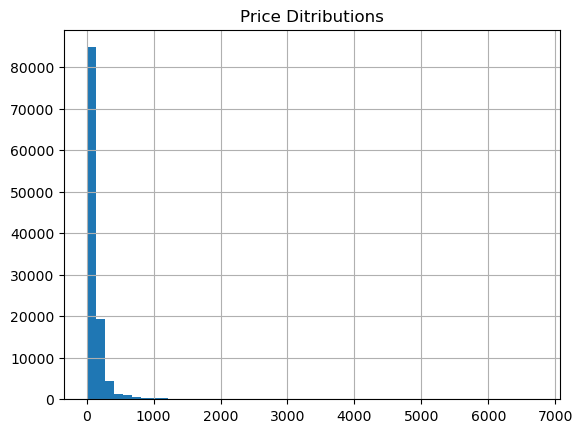

In [14]:
#seperating date and time 
#date/time features Extraction
main_df['order_purchase_timestamp']= pd.to_datetime(main_df['order_purchase_timestamp'])
main_df['order_year'] = main_df['order_purchase_timestamp'].dt.year
main_df['order_month'] = main_df['order_purchase_timestamp'].dt.month
main_df['order_day_of_week'] = main_df['order_purchase_timestamp'].dt.dayofweek
main_df['order_hour'] = main_df['order_purchase_timestamp'].dt.hour

#check distributions
main_df['price'].hist(bins=50)
plt.title('Price Ditributions')
plt.show()

The above shoes are lefty skewed which means most prices are low from 0 < 1000, meaning most of the products are cheap, and there are few expensive items 

In [15]:
main_df.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_year', 'order_month', 'order_day_of_week', 'order_hour'],
      dtype='object')

In [16]:
main_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

Handling Missing values 

In [17]:
main_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty                  0
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
order_year  

In [18]:
#checking rows with null values 
main_df.isnull().any(axis=1).sum()

4007

For missing dataset :thinking of business Logic

In [19]:
#These are naturally missing based on business logic processes
#The Order approved has 15 missing values, and the order might be auto-approved based on the system processing 
main_df['order_approved_at'].fillna(main_df['order_purchase_timestamp'], inplace=True)

#keep delivery date as NAN(they are meaningful)

#order_delivered_carrier_date= 1,194 missing - order not shipped yet 
#order_delivered_cutomer_date-2,454 missing -orders not delivered yet
#keeping these as NAN -they represent unfinished orders!

In [20]:
#for product info columns (date product missing)
#since 1603 missing values are likely the same product missing across all the columns 
#checking if the product is missing 

print("Product missing category info:")
missing_products =main_df[main_df['product_category_name'].isnull()]
print(f"Unique product: {missing_products['product_id'].nunique()}")

Product missing category info:
Unique product: 610


In [21]:
#filling with unknown or most common values 
main_df['product_category_name'].fillna('unknown', inplace =True)
main_df['product_name_lenght'].fillna(main_df['product_name_lenght'].median(), inplace=True)
main_df['product_description_lenght'].fillna(main_df['product_description_lenght'].median(), inplace =True)
main_df['product_photos_qty'].fillna(1, inplace =True) #most products have 1 photos 

In [22]:
#PRODUCT DIMENSION IMPUTATION VALUES 
#use median imputation for dimension 
main_df['product_weight_g'].fillna(main_df.product_weight_g.median(), inplace=True)
main_df['product_length_cm'].fillna(main_df.product_length_cm.median(), inplace=True)
main_df['product_height_cm'].fillna(main_df.product_height_cm.median(), inplace=True)
main_df['product_width_cm'].fillna(main_df.product_width_cm.median(), inplace=True)

In [23]:
#verify missing values in key columns 
print("Missing values after cleaning")
print(main_df[['price', 'product_category_name', 'product_weight_g']].isnull().sum())

Missing values after cleaning
price                    0
product_category_name    0
product_weight_g         0
dtype: int64


In [24]:
main_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_year', 'order_month', 'order_day_of_week', 'order_hour'],
      dtype='object')

In [25]:
main_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
order_year  

In [26]:
#calculating delivery tine 
main_df['delivery_days']= (main_df['order_delivered_customer_date'] - main_df['order_purchase_timestamp']).dt.days

#total order value
main_df['total_order_value'] = main_df['price'] * main_df['freight_value']

#is weekend order?
main_df['is_weekend'] = main_df['order_day_of_week'].isin([5, 6])

In [32]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112650 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

In [29]:
#saving the clean preprocessed datasewt 
import pickle 
import os 

#save the clean main_df 
output_dir= "../data/processed/"
os.makedirs(output_dir, exist_ok=True)

#save main_df to pickle file 
with open(f"{output_dir}main_df_cleaned.pkl", "wb") as f:
    pickle.dump(main_df, f)
    
print(f"cleaned data saved to{output_dir} main_df_cleaned.pkl" )
print(f"Dataset shape: {main_df.shape}")


cleaned data saved to../data/processed/ main_df_cleaned.pkl
Dataset shape: (112650, 33)
